# Step 1: Problem statement

According to the WHO(World health organization), worlwide obesity has nearly tripled since 1975. Most of the world's population live in countries where overweight and obesity kills more people than does malnourishment(WHO). 

For Adults, WHO defines overweight and obesity as follows:
 - overweight is a BMI greater than or equal to 25; and
 - obesity is a BMI greater than or equal to 30


Raised BMI is a major risk factor for noncommunicable diseases such as cardiovascular diseases (leading cause of death in 2012), diabetes and musculoskeletal disorders such as osteoarthritis.  A healthy diet and regular physical activity help people achieve and maintain a healthy weight starting at an early age and continuing throughout life.

## Data Aquisition

https://archive.ics.uci.edu/ml/datasets/Estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition+

Facts about obesity according to WHO (World Health Organization)
https://www.who.int/news-room/fact-sheets/detail/obesity-and-overweight


# Data Dictionary

This is a <b>Structured </b>data source that is supervised (labeled).  We will be using a Classification model. 
Data features are divided into two categories: <b>Eating habits</b> and <b>Physical conditions</b>. Obesity level is measured by NObeyesdad.

<b> Class variables NObeyesdad (Obesity Level)</b>

Attributes related to Obesity level:

1. Insufficient_Weight
2. Normal_Weight
3. Overweight_Level_I
4. Overweight_Level_II
5. Obesity_Type_I
6. Obesity_Type_II
7. Obesity_Type_III

<b> Attributes related with eating habits: </b>
 - Frequent consumption of high caloric food (FAVC)
 - Frequency of consumption of vegetables (FCVC)
 - Number of main meals (NCP)
 - Consumption of food between meals (CAEC)
 - Consumption of water daily (CH20)
 - Consumption of alcohol (CALC)

<b> Attributes related with physical conditions </b>
 - Calories consumption monitoring (SCC)
 - Physical activity frequency (FAF)
 - Time using technology devices (TUE)
 - Transportation used (MTRANS)
 - Gender : Male, Female
 - Age : Interger Numeric Values
 - Height : Interger Numeric Values (Mt) 
 - Weight : Interger Numeric Values (Kg)
 - Family history with overweight (Yes, No)

# Predictive analysis: 

What we hope to achieve with our final analysis is to determine the probability of obesity. We will collect data features from the user as an input form and run our predictive analysis.  The data set included is categorical  so 

<b>Target data: NObesity</b>

NObesity determines levels of obesity: Normal_Weight,Underweight, Overweight_level_1, Overweight_level_2, Overweight_level_3 


 # Feature extraction

Load the data from csv and apply data cleaning technique

In [3]:
# Import python packages that we are using

import numpy as np # mathematical computations, linear algebra
import pandas as pd # import data libraries, read csv file
import matplotlib.pyplot as plt # interactive visualizations
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px

from sklearn import preprocessing

In [4]:
# Load dataset, drop nulls, apply logic to column NObeyesdad and create a new column Normal_Weight

df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv").dropna()

# Add a column 'obese'.  If 'NObeyesdad'= 'Normal_Weight' then obese = False, else true. 

df['Normal_Weight'] = np.where(df['NObeyesdad']!= 'Normal_Weight', False, True)
df.head()
#df.shape
#df.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Normal_Weight
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight,True
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight,True
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight,True
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I,False
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II,False


<b>Encoding our labels to numerical as data prep for analysis </b>

In [5]:
le = preprocessing.LabelEncoder()

le.fit(df.Gender)
le.classes_
df['Gender_encoded']=le.transform(df.Gender)

df

categortical_variables = ['Gender','family_history_with_overweight', 'FAVC','CAEC','SMOKE','SCC','CALC','MTRANS','NObeyesdad','Normal_Weight']



for cat in categortical_variables:
    categortical_encoded_variable = cat+'_Encoded'
    print(categortical_encoded_variable)
    le.fit(df[cat])
    df[categortical_encoded_variable] = le.transform(df[cat])

Gender_Encoded
family_history_with_overweight_Encoded
FAVC_Encoded
CAEC_Encoded
SMOKE_Encoded
SCC_Encoded
CALC_Encoded
MTRANS_Encoded
NObeyesdad_Encoded
Normal_Weight_Encoded


 # Exploratory Data Analysis

In [ ]:
sns.pairplot(df)
df.shape
df.describe()

<b>Stripplot below was not suitable to identify a suitable relationship between age and weight, we will continue
in trying other visualizations. What we are looking for is a linear relationship.</b> 

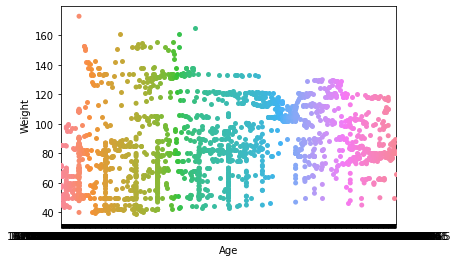

In [6]:
df['Age'].unique()
g = sns.stripplot(x="Age", y="Weight", data=df, jitter=True)

<b>Below we will use distplot to have a view on what our data looks like.  What we see below is that the majority of our data is representing a larger group in their 20's and 30's.  This will be our guide to grouping age groups for a better analysis. </b>

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functio

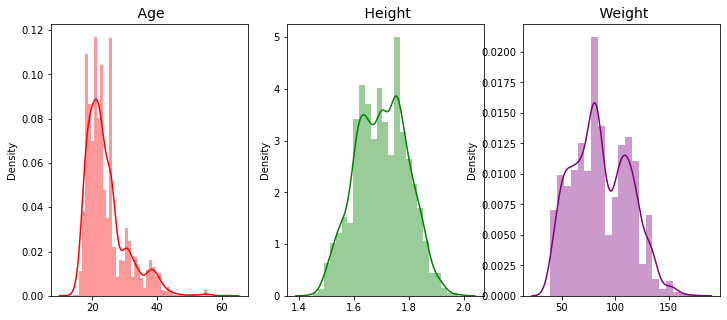

In [6]:
# Visualizations will give us an idea on what the data looks like 
fig , ax = plt.subplots(1,3,figsize = (12,5))

Age = df.Age.values
Height= df.Height.values
Weight = df.Weight.values


sns.distplot(Age , ax = ax[0] , color = 'red').set_title(' Age' , fontsize = 14)
sns.distplot(Height , ax = ax[1] , color = 'green').set_title(' Height' , fontsize = 14)
sns.distplot(Weight , ax = ax[2] , color = 'purple').set_title(' Weight' , fontsize = 14)


plt.show()

In [7]:
def Age_groups(x):
  if x <=29:
    return 'Age<29'
  elif x <= 49:
    return 'Age 30-49'
  elif x <= 65:
    return 'Age 50-65'
 

In [9]:
df['Age_Groups'] = df['Age'].apply(Age_groups)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,...,family_history_with_overweight_Encoded,FAVC_Encoded,CAEC_Encoded,SMOKE_Encoded,SCC_Encoded,CALC_Encoded,MTRANS_Encoded,NObeyesdad_Encoded,Normal_Weight_Encoded,Age_Groups
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,...,1,0,2,0,0,3,3,1,1,Age<29
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,...,1,0,2,1,1,2,3,1,1,Age<29
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,...,1,0,2,0,0,1,3,1,1,Age<29
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,...,0,0,2,0,0,1,4,5,0,Age<29
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,...,0,0,2,0,0,2,3,6,0,Age<29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,...,1,1,2,0,0,2,3,4,0,Age<29
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,...,1,1,2,0,0,2,3,4,0,Age<29
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,...,1,1,2,0,0,2,3,4,0,Age<29
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,...,1,1,2,0,0,2,3,4,0,Age<29


/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



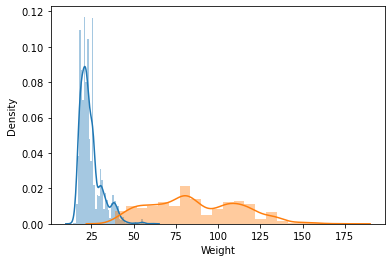

In [10]:
dist_plot_age = sns.distplot(df['Age'])
dist_plot_age = sns.distplot(df['Weight'])
#dist_plot_age = sns.distplot(df['Height'])


In [11]:
round(df['Weight']).unique()

array([ 64.,  56.,  77.,  87.,  90.,  53.,  55.,  68., 105.,  80.,  99.,
        60.,  66., 102.,  78.,  82.,  70.,  50.,  65.,  52.,  76.,  83.,
        62.,  49.,  48.,  67.,  88.,  75.,  72.,  54.,  44.,  58.,  57.,
        69.,  95., 112.,  85.,  45.,  91.,  86.,  93.,  84.,  42.,  63.,
        51.,  61., 109.,  94.,  59., 130.,  79.,  96.,  98.,  74., 118.,
        40.,  71., 100.,  73., 114., 121., 120.,  47.,  81., 115., 107.,
       110., 173.,  97., 125.,  92., 108.,  39., 113.,  89., 104., 127.,
       111., 138., 165., 133., 134.,  43.,  41.,  46., 101., 106., 103.,
       119., 117., 122., 116., 129., 124., 126., 123., 128., 150., 132.,
       152., 131., 142., 153., 136., 139., 156., 137., 141., 144., 149.,
       155., 161., 151., 140., 135., 154., 143., 147.])

# Preparing data for visualization and analysis

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3704: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

/Users/rebekahsilva/opt/anaconda3/lib/python3.8/site-packages/seaborn/categorical.py:3710: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



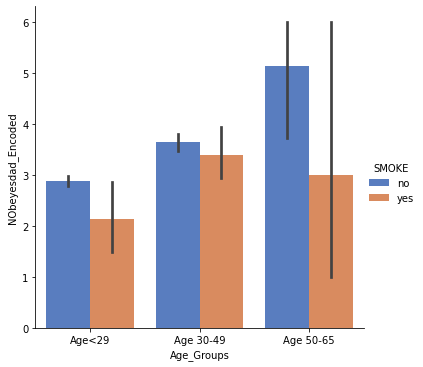

In [12]:
g = sns.factorplot(x='Age_Groups', y='NObeyesdad_Encoded', data=df, hue="SMOKE", size=5, kind='bar', palette='muted')

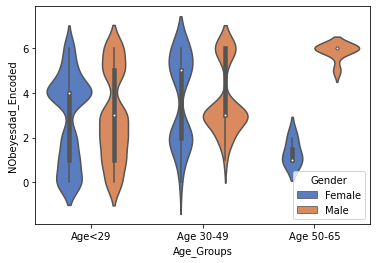

In [13]:
g = sns.violinplot(x='Age_Groups', y='NObeyesdad_Encoded',  hue="Gender",data=df, size=8, kind='bar', palette='muted')

In [14]:
#print(df.NObeyesdad.unique(),df.NObeyesdad_Encoded.unique())
df[df['NObeyesdad_Encoded']==1][['NObeyesdad','NObeyesdad_Encoded']] 

#df.head[df['NObeyesdad_Encoded'==4]][['NObeyesdad','NObeyesdad_Encoded']]



,NObeyesdad,NObeyesdad_Encoded
0,Normal_Weight,1
1,Normal_Weight,1
2,Normal_Weight,1
5,Normal_Weight,1
6,Normal_Weight,1
...,...,...
491,Normal_Weight,1
493,Normal_Weight,1
494,Normal_Weight,1
495,Normal_Weight,1


<b>Distribution of features: Family history, Normal weight, calc (alcohol consumption)</b>

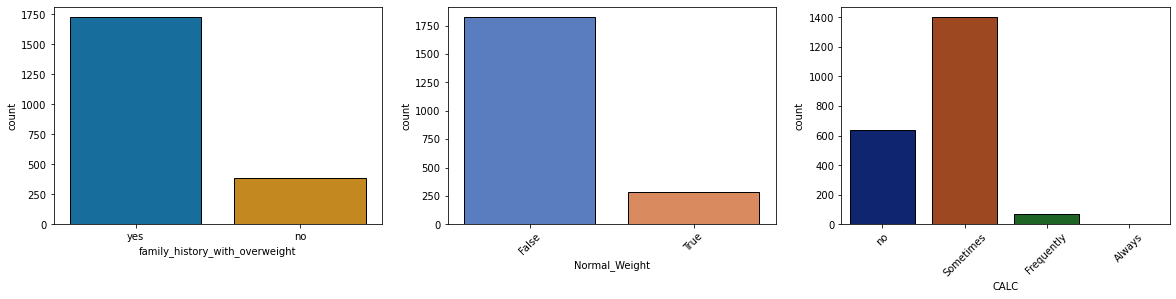

In [15]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.countplot(x= 'family_history_with_overweight', data = df, palette="colorblind",edgecolor="black")
plt.subplot(132)
sns.countplot(x= 'Normal_Weight', data = df, palette="muted",edgecolor="black")
plt.xticks(rotation=45)
plt.subplot(133)
sns.countplot(x= 'CALC', data = df, palette="dark",edgecolor="black")
plt.xticks(rotation=45)
plt.show()

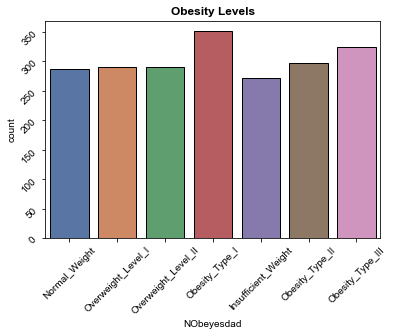

In [16]:
sns.countplot(x="NObeyesdad",data=df,palette="deep",edgecolor="black")
plt.title('Obesity Levels', weight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# changing the font size
sns.set(font_scale=1)